In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/examples/pyplot-perso/")
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/docs/source/figures/tutorials/isotropic-systems/"

In [3]:
from matplotlib import pyplot as plt

In [4]:
datapath = git_path + "/nmrformd-data/polymer-in-water/raw-data/NPEG32/"

In [5]:
u = mda.Universe(datapath+"init.data", datapath+"prod.xtc")

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 1
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 2
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 3
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 4
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [6]:
n_molecules = u.atoms.n_residues
print(f"The number of molecules is {n_molecules}")
timestep = np.int32(u.trajectory.dt)
print(f"The timestep is {timestep} ps")
total_time = np.int32(u.trajectory.totaltime)
print(f"The total simulation time is {total_time} ps")

The number of molecules is 352
The timestep is 1 ps
The total simulation time is 840 ps


In [7]:
H_PEG = u.select_atoms("type 3 5")
H_H2O = u.select_atoms("type 7")
H_ALL = H_PEG + H_H2O
nmr_ALL = nmrmd.NMR(u, atom_group = H_ALL, neighbor_group = H_ALL, number_i=40)

In [8]:
T1 = np.round(nmr_ALL.T1,2)
print(f"The total NMR relaxation time is T1 = {T1} s")

The total NMR relaxation time is T1 = 1.98 s


In [27]:
R1_spectrum = nmr_ALL.R1
R2_spectrum = nmr_ALL.R2
T1_spectrum = 1/R1_spectrum
T2_spectrum = 1/R2_spectrum
f = nmr_ALL.f

/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:119: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:125: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-dark.png",
/home/simon/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


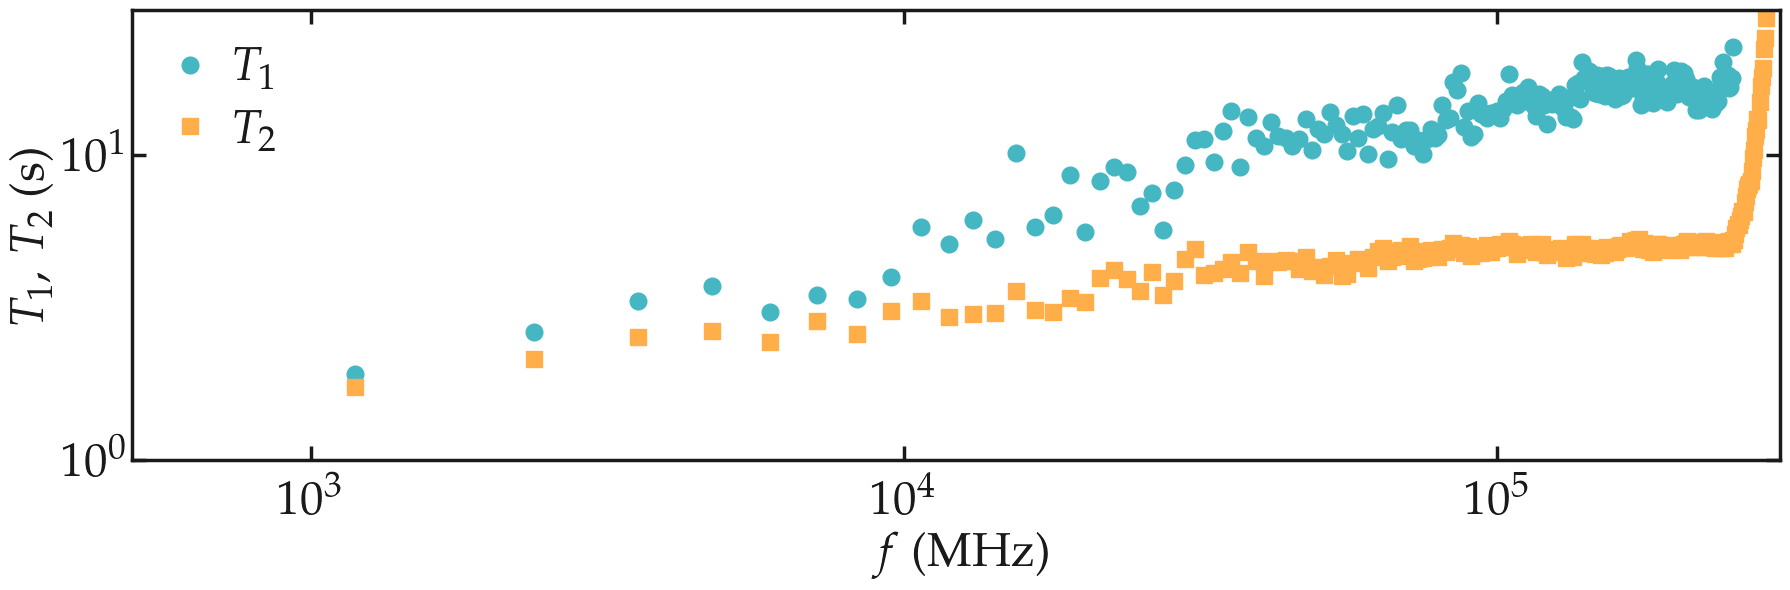

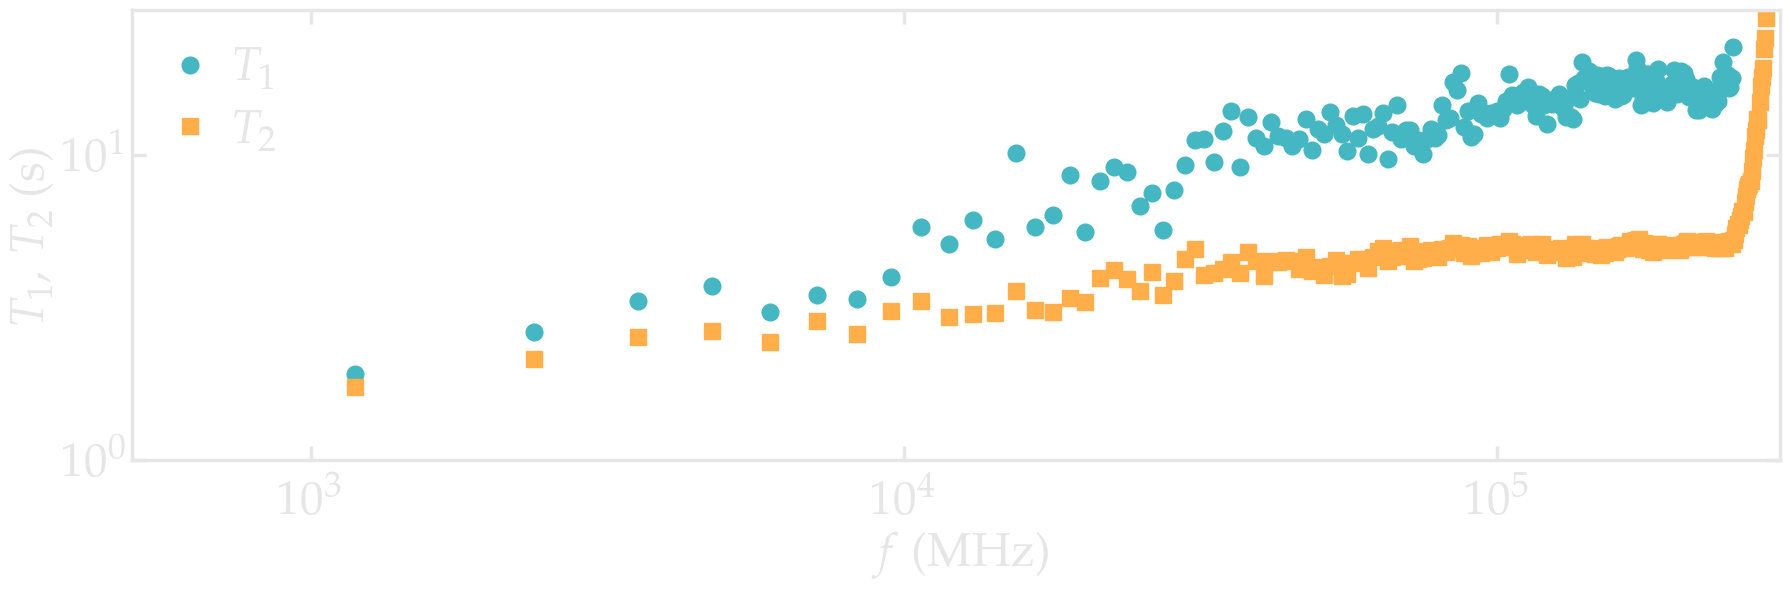

In [32]:
filename = "T1"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(f, T1_spectrum, 'o', color=colors["mycyan"], markersize = 12, linewidth=4, label=r'$T_1$')
    ax[-1].loglog(f, T2_spectrum, 's', color=colors["myorange"], markersize = 12, linewidth=4, label=r'$T_2$')
    complete_panel(ax[-1], r'$f$ (MHz)', r'$T_1, \, T_2$ (s)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(5e2, 3e5), y_boundaries=(1, 30)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

In [33]:
nmr_H2O_intra = nmrmd.NMR(u, atom_group = H_H2O, type_analysis="intra_molecular", number_i=40)
nmr_PEG_intra = nmrmd.NMR(u, atom_group = H_PEG, type_analysis="intra_molecular", number_i=40)

In [36]:
t = nmr_PEG_intra.t
G_intra_H2O = nmr_H2O_intra.gij[0]
G_intra_PEG = nmr_PEG_intra.gij[0]

/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:119: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:125: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-dark.png",
/home/simon/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


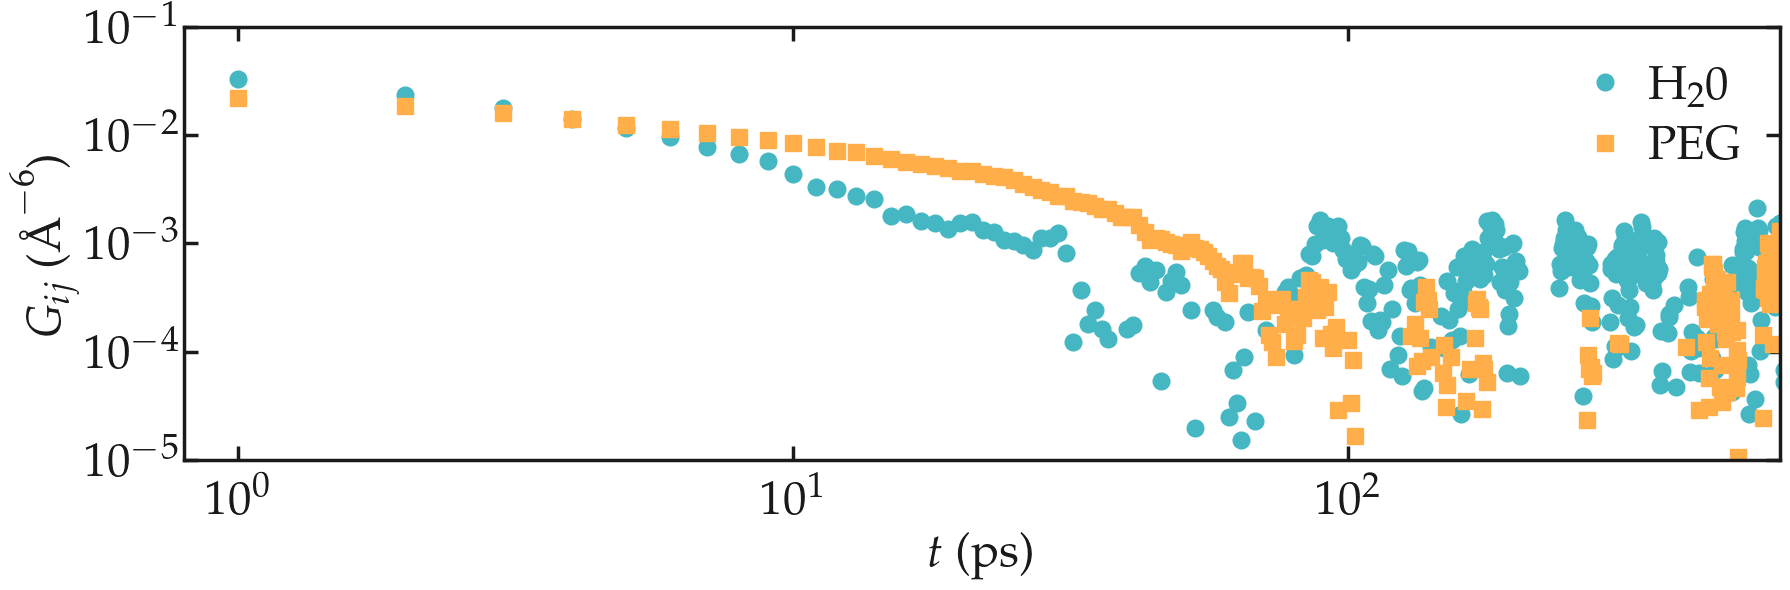

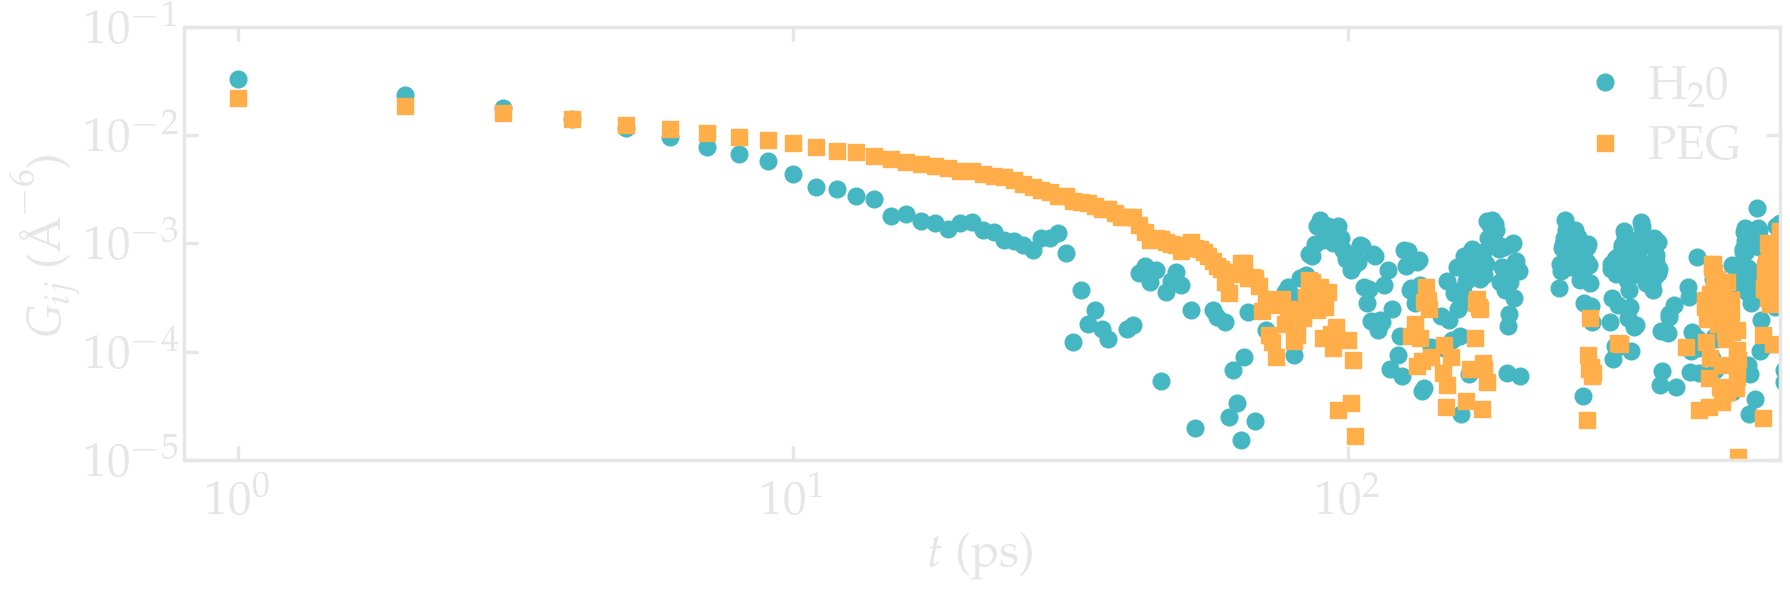

In [43]:
filename = "Gintra"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(t, G_intra_H2O, 'o', color=colors["mycyan"], markersize = 12, linewidth=4, label=r'H$_2$0')
    ax[-1].loglog(t, G_intra_PEG, 's', color=colors["myorange"], markersize = 12, linewidth=4, label=r'PEG')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G_{ij}$ ($\mathrm{\AA}^{-6}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.8, 6e2), y_boundaries=(1e-5, 0.1)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

In [48]:
tau_rot_H2O = np.round(np.trapz(G_intra_H2O, t)/G_intra_H2O[0],2)
tau_rot_PEG = np.round(np.trapz(G_intra_PEG, t)/G_intra_PEG[0],2)
print(f"The rotational time of H2O is = {tau_rot_H2O} ps")
print(f"The rotational time of PEG is = {tau_rot_PEG} ps")

The rotational time of H2O is = 6.35 ps
The rotational time of PEG is = 8.34 ps
